In [1]:
from env.constants import PICKUPABLE_OBJECTS, OPENABLE_OBJECTS, RECEPTACLE_OBJECTS, THOR_COMMIT_ID, SCENE_TYPE_TO_SCENES
from ai2thor.controller import Controller
from ai2thor.platform import CloudRendering
from env.utils import get_top_down_frame
import prior
from copy import deepcopy
from PIL import Image
from env.constants import PROCTHOR_COMMIT_ID


dataset = prior.load_dataset('procthor-10k', revision="main")

/home/yhkim/miniconda3/envs/robot-home-service/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading test: 100%|██████████| 1000/1000 [00:00<00:00, 9109.81it/s]


In [6]:
frh = {}
for split in ["train", "val", "test"]:
    l = []    
    for it, h in enumerate(dataset[split]):
        if h['metadata']['roomSpecId'] == "4-room":
            l.append(it)
    frh[split] = l
    print(f'{split}: {len(l)}')

train: 2351
val: 242
test: 257


In [3]:
dataset["train"][4]["objects"]

[{'assetId': 'Bed_5',
  'children': [{'assetId': 'pillow_8',
    'id': 'Pillow|4|0|1',
    'kinematic': False,
    'position': {'x': 9.9148530189991,
     'y': 0.9668126851320267,
     'z': 4.660642883300783},
    'rotation': {'x': 0, 'y': 270.0, 'z': 0},
    'layer': 'Procedural3'},
   {'assetId': 'Basketball_1',
    'id': 'BasketBall|surface|4|0',
    'kinematic': False,
    'position': {'x': 9.59389877319336,
     'y': 0.8993483781814575,
     'z': 4.411074161529541},
    'rotation': {'x': 0.0, 'y': 270.0, 'z': 0.0},
    'layer': 'Procedural3'},
   {'assetId': 'Cellphone_8',
    'id': 'CellPhone|surface|4|12',
    'kinematic': False,
    'position': {'x': 8.771522521972656,
     'y': 0.8347892045974732,
     'z': 4.786177635192871},
    'rotation': {'x': 0.0, 'y': 270.0, 'z': 0.0},
    'layer': 'Procedural3'},
   {'assetId': 'Box_22',
    'id': 'Box|surface|4|15',
    'kinematic': False,
    'openness': 1,
    'position': {'x': 9.22469711303711,
     'y': 0.950204074382782,
     'z'

In [ ]:
c = None
for nh in frh["test"]:
    house = dataset["test"][nh]
    if c is None:
        c = Controller(scene=house, platform=CloudRendering, commit_id=PROCTHOR_COMMIT_ID)
    else:
        c.reset(scene=house)

    

In [9]:
house = dataset["train"][3]
c = Controller(scene=house, platform=CloudRendering, commit_id=PROCTHOR_COMMIT_ID)

In [10]:
dataset["val"][7]['rooms']

[{'id': 'room|2',
  'roomType': 'Bedroom',
  'children': [],
  'ceilings': [],
  'floorPolygon': [{'x': 1.868, 'y': 0, 'z': 3.736},
   {'x': 5.605, 'y': 0, 'z': 3.736},
   {'x': 5.605, 'y': 0, 'z': 0.0},
   {'x': 0.0, 'y': 0, 'z': 0.0},
   {'x': 0.0, 'y': 0, 'z': 3.736}],
  'floorMaterial': 'WoodSlashhatch',
  'layer': 'Procedural2'},
 {'id': 'room|3',
  'roomType': 'Bathroom',
  'children': [],
  'ceilings': [],
  'floorPolygon': [{'x': 0.0, 'y': 0, 'z': 3.736},
   {'x': 0.0, 'y': 0, 'z': 7.473},
   {'x': 1.868, 'y': 0, 'z': 7.473},
   {'x': 1.868, 'y': 0, 'z': 3.736}],
  'floorMaterial': 'OrangeCabinet 1',
  'layer': 'Procedural1'}]

In [5]:
splits = ("train", "val", "test")
roomSpecs = {v: {} for v in splits}
for split in splits:
    for it, house in enumerate(dataset[split]):
        md = house["metadata"]
        roomSpec = md["roomSpecId"]
        if roomSpec not in roomSpecs[split]:
            roomSpecs[split][roomSpec] = []
        roomSpecs[split][roomSpec].append(it)
    

In [6]:
roomSpecs["train"].keys()
for k, v in roomSpecs["train"].items():
    print(f'{k}: {len(v)}')

bedroom-bathroom: 2537
bedroom: 1316
living-room: 1268
bathroom: 1184
kitchen-living-room: 2425
kitchen: 1270


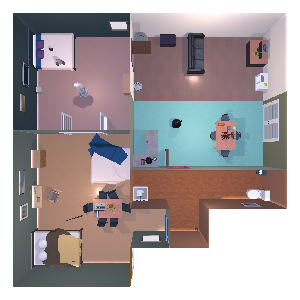

In [6]:
house = dataset["val"][3]
c.reset(scene=house)
# c.step("TeleportFull", **house["metadata"]["agent"])
get_top_down_frame(c)

In [8]:
c.step("TeleportFull", **house["metadata"]["agent"])

<ai2thor.server.Event at 0x7f179c258160
    .metadata["lastAction"] = TeleportFull
    .metadata["lastActionSuccess"] = False
    .metadata["errorMessage"] = "ArgumentOutOfRangeException: Specified argument was out of the range of valid values. Parameter name: Teleport position (4.500000, 0.950000, 6.500000) out of scene bounds! Ignore this by setting forceAction=true.. trace:   at UnityStandardAssets.Characters.FirstPerson.BaseFPSAgentController.teleportFull (UnityEngine.Vector3 position, UnityEngine.Vector3 rotation, System.Single horizon, System.Boolean forceAction) [0x000c2] in <5b8911c9feec4916a6cdacfa58032e78>:0    at UnityStandardAssets.Characters.FirstPerson.PhysicsRemoteFPSAgentController.TeleportFull (UnityEngine.Vector3 position, UnityEngine.Vector3 rotation, System.Single horizon, System.Boolean standing, System.Boolean forceAction) [0x00079] in <5b8911c9feec4916a6cdacfa58032e78>:0    at (wrapper managed-to-native) System.Reflection.MonoMethod.InternalInvoke(System.Reflecti

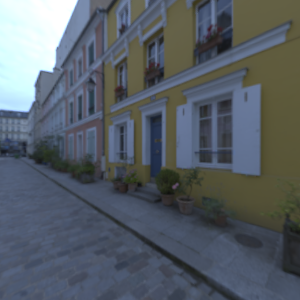

In [7]:
Image.fromarray(c.last_event.frame)